In [3]:
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt

In [4]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels.idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

images_tr, labels_tr = loadMNIST( "train", "C:\\Users\\crist\\alg" )
images_te, labels_te = loadMNIST( "t10k", "C:\\Users\\crist\\alg" )
# imagenes en array de 60000 x 28 x 28 -> 60000 imagenes de 28x28

In [5]:
# coger una aleatoria del grupo de test
i = random.randint(0,images_te.shape[0])
img_test = images_te[i].flatten()
label_test = labels_te[i]

In [6]:
# buscamos los vecinos más cercanos (KNN)
k = 5 #número de vecinos

distances = []
for i in range(images_tr.shape[0]):
    dist = np.sqrt(np.sum(np.square(images_tr[i].flatten() - img_test)))
    distances.append((dist, labels_tr[i])) # guardamos las etiquetas y la distancia

#ordenamos por distancia y nos quedamos con los k vecinos más cercanos
distances.sort(key=lambda x: x[0])
neighbors = distances[:k]

In [7]:
# contamos los votos para ver qué etiqueta gana
votes = [0,0,0,0,0,0,0,0,0,0]
for neighbor in neighbors:
    votes[neighbor[1]] = votes[neighbor[1]] + 1
# obtenemos la etiqueta ganadora
pred_label = votes.index(max(votes))


Predicted: 4
Real: 4


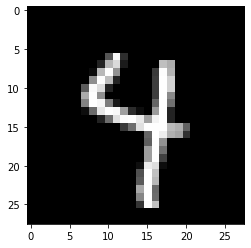

In [8]:
print ("Predicted: " + str(pred_label))
print ("Real: " + str(label_test))
img = plt.imshow(img_test.reshape(28,28), cmap="gray")
display(img)